In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir


In [16]:
def crop_contour_brain_img(image, plot=False):
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grayscale = cv2.GaussianBlur(grayscale,(5,5),0)
    threshold_image =cv2.threshold(grayscale,45,255,cv2.THRESH_BINARY)[1]
    threshold_image =cv2.erode(threshold_image, None, iterations=2)
    threshold_image =cv2.dilate(threshold_image, None, iterations=2)
    
    contour = cv2.findContours(threshold_image.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = imutils.grab_contours(contour)
    c=max(contour,key=cv2.contourArea)
    
    extreme_pnts_left  = tuple(c[c[:, :, 0].argmin()][0])
    extreme_pnts_right = tuple(c[c[:, :, 0].argmax()][0])
    extreme_pnts_top   = tuple(c[c[:, :, 1].argmin()][0])
    extreme_pnts_bot   = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extreme_pnts_top[1]:extreme_pnts_bot[1],extreme_pnts_left[0]:extreme_pnts_right[0]]
    
    if plot:
        plt.figure()
        plt.subplot(1,2,1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both',
                        top =False, bottom = False, left =False, right = False, labelbottom =False,
                        labeltop = False, labelleft =False, labelright =False)
        plt.title('original image')
        plt.subplot(1,2,2)
        plt.imshow(new_image)
        
        plt.tick_params(axis='both', which='both',
                        top =False, bottom = False, left =False, right = False, labelbottom =False,
                        labeltop = False, labelleft =False, labelright =False)
        plt.title('cropped image')
        plt.show()
        
        return new_image
        

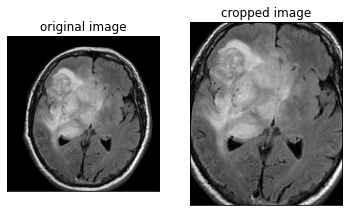

In [17]:
example_image =cv2.imread('C:/Users/X/Desktop/Comp projects/AI_TF/brain_tumor_dataset/yes/Y2.jpg')
example_new_image = crop_contour_brain_img(example_image, True)
